Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


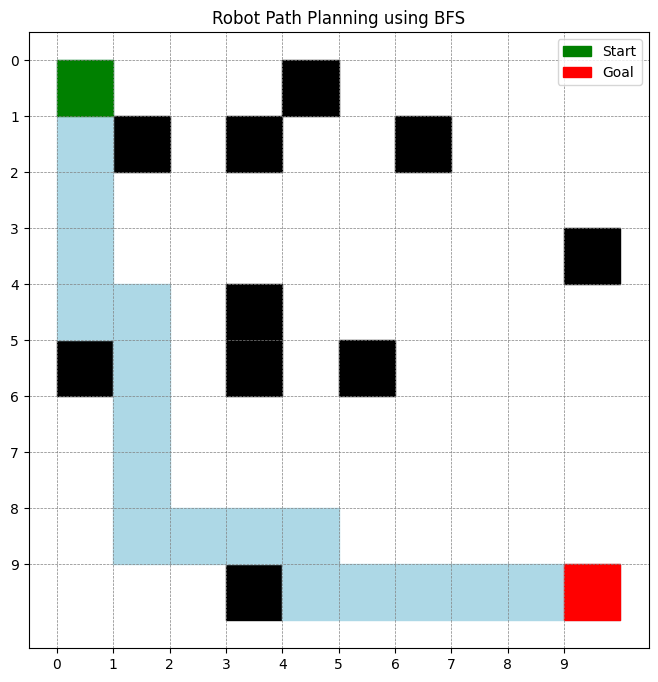

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Define the grid environment
def create_grid(rows, cols, obstacles):
    grid = np.zeros((rows, cols))
    for obstacle in obstacles:
        grid[obstacle] = 1  # Mark obstacles with 1
    return grid

# Define BFS for path planning
def bfs(grid, start, goal):
    rows, cols = grid.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    visited = set()
    queue = deque([(start, [start])])  # (current_position, path_so_far)

    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path

        for direction in directions:
            next_row, next_col = current[0] + direction[0], current[1] + direction[1]

            if 0 <= next_row < rows and 0 <= next_col < cols:  # Within bounds
                next_pos = (next_row, next_col)
                if next_pos not in visited and grid[next_pos] == 0:  # Not visited and not an obstacle
                    visited.add(next_pos)
                    queue.append((next_pos, path + [next_pos]))

    return None  # No path found

# Visualize the grid and path
def visualize_grid(grid, path):
    plt.figure(figsize=(8, 8))
    rows, cols = grid.shape

    # Draw grid
    for row in range(rows):
        for col in range(cols):
            if grid[row, col] == 1:  # Obstacle
                plt.fill_between([col, col + 1], [row, row], [row + 1, row + 1], color="black")

    # Highlight the path
    if path:
        for step in path:
            plt.fill_between([step[1], step[1] + 1], [step[0], step[0]], [step[0] + 1, step[0] + 1], color="lightblue")

    # Mark start and goal
    if path:
        plt.fill_between([path[0][1], path[0][1] + 1], [path[0][0], path[0][0]], [path[0][0] + 1, path[0][0] + 1], color="green", label="Start")
        plt.fill_between([path[-1][1], path[-1][1] + 1], [path[-1][0], path[-1][0]], [path[-1][0] + 1, path[-1][0] + 1], color="red", label="Goal")

    plt.gca().invert_yaxis()
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.title("Robot Path Planning using BFS")
    plt.show()

# Main script
rows, cols = 10, 10
obstacles = [(1, 1), (1, 6), (1, 3), (9, 3), (3, 9), (4, 3), (5, 3), (0, 4), (5, 5), (5, 0)]
start = (0, 0)
goal = (9, 9)

# Create grid and perform BFS
grid = create_grid(rows, cols, obstacles)
path = bfs(grid, start, goal)

if path:
    print("Path found:", path)
else:
    print("No path found!")

# Visualize the grid and path
visualize_grid(grid, path)
